<a href="https://colab.research.google.com/github/Percy-O/Human-Activity-Recognition/blob/main/human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np #mathematical calculation
import pandas as pd # Data Manipulation
from matplotlib import pyplot as plt #Data Visualization
import seaborn as sns # Data Visualisation
import plotly.express as px # Data Visualization
%matplotlib inline

# Loading Dataset

In [ ]:
data = pd.read_csv('drive/MyDrive/train.csv')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Getting the shape of the dataset

In [ ]:
data.shape

(7352, 563)

## Check if null value exists

In [ ]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

## Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


## Data Statistics

In [ ]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


## Checking for missing values

In [ ]:
data.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

## Count the target variable by grouping them together

In [ ]:
data['Activity'].groupby(data['Activity']).count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

# Exploratory Data Analysis

In [ ]:
# Plotting the subject data in respect to the target variables

sns.set_style('ticks')
plt.figure(figsize=(30,20))
plt.title('Subject',fontsize=20)
sns.countplot(x='subject', hue='Activity', data=data)
plt.show()

In [ ]:
# Getting each target variable count

Standing =data['Activity'][data['Activity'] == 'STANDING'].count()
Laying =data['Activity'][data['Activity'] == 'LAYING'].count()
Sitting =data['Activity'][data['Activity'] == 'SITTING'].count()
Walking =data['Activity'][data['Activity'] == 'WALKING'].count()
Walking_downstairs =data['Activity'][data['Activity'] == 'WALKING_DOWNSTAIRS'].count()
Walking_upstairs =data['Activity'][data['Activity'] == 'WALKING_UPSTAIRS'].count()

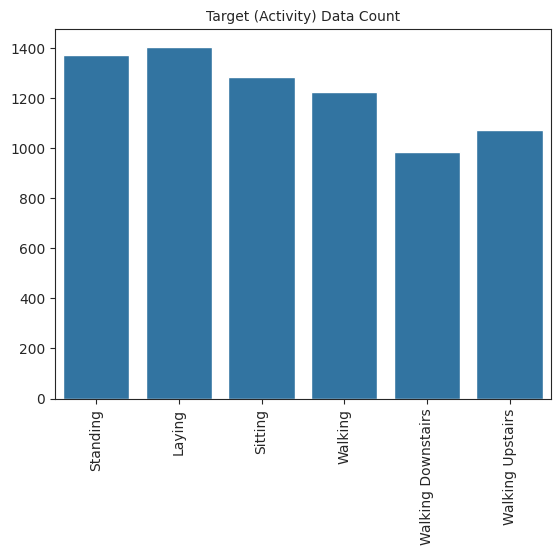

In [ ]:

# Data visualization on the target variable using Barchat
y_target = [Standing,Laying,Sitting,Walking,Walking_downstairs,Walking_upstairs]

x_target=['Standing','Laying','Sitting','Walking','Walking Downstairs','Walking Upstairs']
plt.title('Target (Activity) Data Count',fontsize=10)
sns.barplot(x=x_target, y=y_target,)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# target = [Standing,Laying,Sitting,Walking,Walking_downstairs,Walking_upstairs]
# label =['Standing','Laying','Sitting','Walking','Walking Downstairs','Walking Upstairs']

# plt.pie(x=target,labels=label,explode=[0.1,0,0,0,0,0],autopct='%1.1f%%')
# plt.title('Data Visualization for the target variable ')
# plt.show()

In [ ]:
# pie chart to show the distribution of the data
fig = px.pie(data, names='Activity',height=400,width=600,title='Data visualization for the target variable (Activity)')
fig.show()

In [ ]:
## Bar Box visualization in respect to the x subject
fig = px.box(data_frame=data,x='Activity',y='subject',width=800)
fig.show()

## Dropping Irrelevant X data

In [ ]:
data = data.drop(['subject'], axis=1)

## Disecting the data into X and Y

In [ ]:
x = data.drop(['Activity'],axis=1)
y= data['Activity']

# Scaling the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled)
x_scaled

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.644292,0.489853,0.433547,0.002361,0.008748,0.043237,0.002444,0.008546,0.038236,0.032638,...,0.475511,0.350991,0.147940,0.437030,0.515200,0.267793,0.491741,0.079377,0.798251,0.470687
1,0.639209,0.491795,0.438240,0.000877,0.012824,0.019839,0.000596,0.012749,0.021157,0.028466,...,0.594891,0.201676,0.070666,0.521131,0.496283,0.133774,0.853429,0.077606,0.798487,0.472842
2,0.639827,0.490266,0.443269,0.002310,0.017058,0.010528,0.001740,0.018464,0.011266,0.030654,...,0.726616,0.304605,0.122488,0.434094,0.588950,0.550707,0.906041,0.075533,0.798722,0.475441
3,0.639587,0.486900,0.438359,0.001954,0.008596,0.004662,0.001450,0.008767,0.005349,0.030654,...,0.721515,0.442374,0.264192,0.475464,0.493554,0.820538,0.257822,0.075675,0.799600,0.476168
4,0.638314,0.491715,0.442319,0.000931,0.009945,0.004759,0.000839,0.010331,0.004779,0.028765,...,0.558768,0.324393,0.153612,0.556466,0.561271,0.847339,0.192392,0.076067,0.801776,0.478054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.649833,0.471403,0.409383,0.402307,0.542650,0.538539,0.358850,0.530383,0.530205,0.605398,...,0.477651,0.205011,0.061044,0.397729,0.914859,0.603878,0.287755,0.104058,0.837938,0.524910
7348,0.636926,0.496125,0.426266,0.382346,0.524338,0.529640,0.338724,0.493247,0.540293,0.558720,...,0.598582,0.304610,0.163047,0.526914,0.937840,0.060523,0.701485,0.114080,0.847458,0.525026
7349,0.636694,0.491495,0.477489,0.390891,0.467640,0.637266,0.347742,0.457948,0.666292,0.521999,...,0.613877,0.514134,0.355582,0.520791,0.366638,0.932807,0.852256,0.110434,0.845069,0.520406
7350,0.644827,0.490578,0.420860,0.390430,0.463679,0.634447,0.344756,0.473556,0.659737,0.550851,...,0.520812,0.533662,0.334993,0.442795,0.850370,0.968966,0.205664,0.107409,0.843234,0.512670


# Data Correlation

In [ ]:
x_data_corr = x_scaled.corr()
x_data_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
1,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
2,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,-0.020481,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643
3,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
4,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169


# Feature Selection
* Selecting the feature with only Correlation 0.95
* Getting the features from the selected features for processing


In [ ]:
get_corr_columns = set()
for i in range(len(x_data_corr.columns)):
    for j in range(i):
        if (x_data_corr.iloc[i, j]) > 0.95:
            get_corr_columns.add(x.columns[i])
len(get_corr_columns)
print('Number of features:', len(get_corr_columns))

### Getting the feature and from the selected features for processing

In [ ]:
X_data = x.loc[:,x.columns.isin(list(get_corr_columns))]

# Visualize the correlation using heatmap

In [ ]:
f, ax = plt.subplots(figsize =(20, 20))
sns.heatmap(X_data.corr(), ax = ax, cmap ="YlGnBu", linewidths = 0.1)

#Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y , test_size=0.2 ,random_state=27)
print(X_train.shape,'-Xtrain \n',
      X_test.shape,'-Xtest \n',
      y_train.shape,'-Ytrain \n',
      y_test.shape , '-Ytest' )

# Categorical Encoding
* Encoding the target variable (Activity)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
y_train

In [ ]:
# Mapping the Label Values and the Numerical Values together

le_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
le_mapping

# Model Evaluation

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
def model_evaluation(y_pred,y_test):
  a_score = accuracy_score(y_pred,y_test)
  c_report = classification_report(y_pred,y_test)

  print(f'Accuracy Score - {a_score}')
  print(f'Classification Report - \n {c_report}')

  conf_mat = confusion_matrix(y_pred,y_test)
  sns.set_style(style='white')
  plt.figure(figsize=(12,8))
  heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')
  heatmap.set_title('Confusion Matrix Heatmap for \n Human Activity Recognition', fontdict={'fontsize':15}, pad=12)
  heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
  heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
  # heatmap.set_xticklabels(['NO','YES'], fontdict={'fontsize':12})
  # heatmap.set_yticklabels(['NO','YES'], fontdict={'fontsize':12})
  plt.show()



# Model Building

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)

model_evaluation(y_pred,y_test)

## Ada Boost Classifier

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# ab = AdaBoostClassifier()
# ab.fit(X_train,y_train)


In [ ]:
# y_pred = ab.predict(X_test)
# y_pred

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# gb = GradientBoostingClassifier()
# gb.fit(X_train,y_train)


In [ ]:
# y_pred = gb.predict(X_test)
# y_pred